In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
batch_size = 50
img_height = 256
img_width = 256
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
r'C:\Users\KIIT\Desktop\drowniness detection\dataset_new\train',
seed =75,
image_size=(img_height,img_width),
batch_size=batch_size
)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
r'C:\Users\KIIT\Desktop\drowniness detection\dataset_new\test',
seed =75,
image_size=(img_height,img_width),
batch_size=batch_size
)

Found 2467 files belonging to 4 classes.
Found 433 files belonging to 4 classes.


In [ ]:
class_names = training_ds.class_names

In [ ]:
for images, labels in training_ds.take(1):
    for i in range(2):
        print(images)

tf.Tensor(
[[[[1.52000000e+02 1.14000000e+02 7.80000000e+01]
   [1.52000000e+02 1.14000000e+02 7.80000000e+01]
   [1.52000000e+02 1.14000000e+02 7.80000000e+01]
   ...
   [8.66210938e+00 8.66210938e+00 6.62109375e-01]
   [8.19726562e+00 8.19726562e+00 1.97265625e-01]
   [8.00000000e+00 8.00000000e+00 0.00000000e+00]]

  [[1.51808594e+02 1.13808594e+02 7.78085938e+01]
   [1.51808594e+02 1.13808594e+02 7.78085938e+01]
   [1.51808594e+02 1.13808594e+02 7.78085938e+01]
   ...
   [9.23632812e+00 9.23632812e+00 1.10697937e+00]
   [8.77148438e+00 8.77148438e+00 4.64187622e-01]
   [8.57421875e+00 8.57421875e+00 1.91406250e-01]]

  [[1.51347656e+02 1.13347656e+02 7.73476562e+01]
   [1.51347656e+02 1.13347656e+02 7.73476562e+01]
   [1.51347656e+02 1.13347656e+02 7.73476562e+01]
   ...
   [1.06191406e+01 1.06191406e+01 2.17829895e+00]
   [1.01542969e+01 1.01542969e+01 1.10697937e+00]
   [9.95703125e+00 9.95703125e+00 6.52343750e-01]]

  ...

  [[1.57347656e+02 1.17347656e+02 8.23476562e+01]
   [1

In [21]:
for images,labels in testing_ds.take(1):
    for i in range(2):
        print(images)

tf.Tensor(
[[[[255.        255.        255.       ]
   [255.        255.        255.       ]
   [255.        255.        255.       ]
   ...
   [176.39062   169.89062   176.89062  ]
   [172.39062   168.8125    165.1875   ]
   [166.20312   165.76562   157.95312  ]]

  [[255.        255.        255.       ]
   [255.        255.        255.       ]
   [255.        255.        255.       ]
   ...
   [220.92188   215.92188   222.28125  ]
   [205.70312   200.70312   204.70312  ]
   [194.9375    192.9375    196.90625  ]]

  [[255.        255.        255.       ]
   [255.        255.        255.       ]
   [255.        255.        255.       ]
   ...
   [254.71875   253.34375   251.09375  ]
   [249.51562   248.04688   243.59375  ]
   [232.85938   232.        229.4375   ]]

  ...

  [[251.34375   244.59375   239.09375  ]
   [205.95312   172.95312   176.20312  ]
   [181.17188   157.42188   157.42188  ]
   ...
   [112.828125  112.828125  104.828125 ]
   [116.265625  116.265625  108.265625 ]
   [1

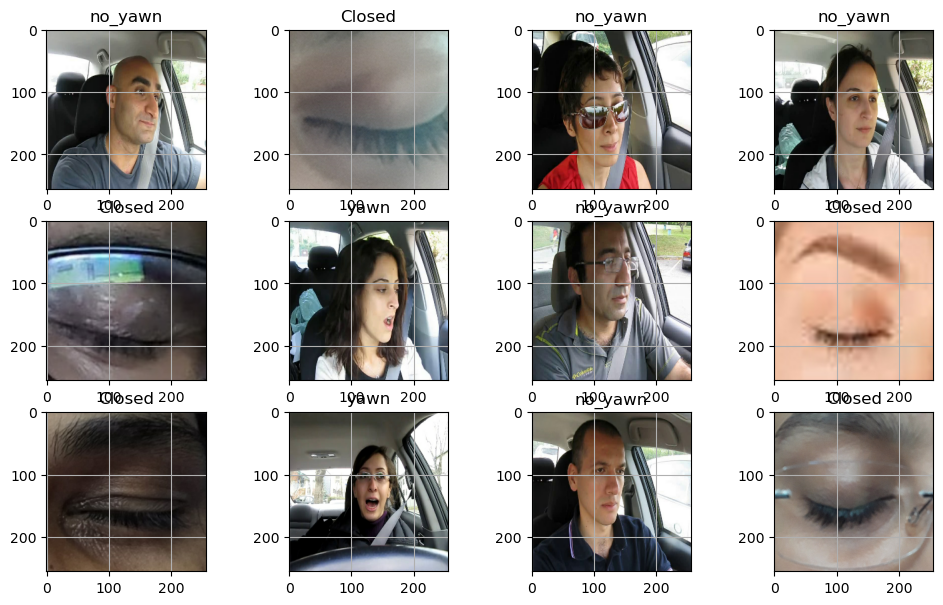

In [34]:
plt.figure(figsize=(12,12))
for images, labels in training_ds.take(1):
    for i in range(12):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.grid(True)                          

In [35]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [42]:
model = tf.keras.models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(480,640,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
     
    layers.GlobalAveragePooling2D(),
    layers.Dense(256,activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
    
])

In [43]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
drow = model.fit(training_ds, validation_data=testing_ds, epochs = 15)

Epoch 1/15
50/50 [==============================] - 199s 4s/step - loss: 1.0682 - accuracy: 0.4167 - val_loss: 0.7367 - val_accuracy: 0.5035
Epoch 2/15
50/50 [==============================] - 253s 5s/step - loss: 0.7281 - accuracy: 0.5711 - val_loss: 0.7264 - val_accuracy: 0.5312
Epoch 3/15
50/50 [==============================] - 250s 5s/step - loss: 0.7052 - accuracy: 0.5788 - val_loss: 0.7109 - val_accuracy: 0.5520
Epoch 4/15
50/50 [==============================] - 203s 4s/step - loss: 0.6802 - accuracy: 0.6003 - val_loss: 0.7596 - val_accuracy: 0.5820
Epoch 5/15
50/50 [==============================] - 188s 4s/step - loss: 0.6741 - accuracy: 0.6040 - val_loss: 0.7179 - val_accuracy: 0.5935
Epoch 6/15
50/50 [==============================] - 172s 3s/step - loss: 0.6677 - accuracy: 0.6169 - val_loss: 0.6814 - val_accuracy: 0.5843
Epoch 7/15
50/50 [==============================] - 237s 5s/step - loss: 0.6665 - accuracy: 0.6161 - val_loss: 0.6455 - val_accuracy: 0.5912
Epoch 8/15
50

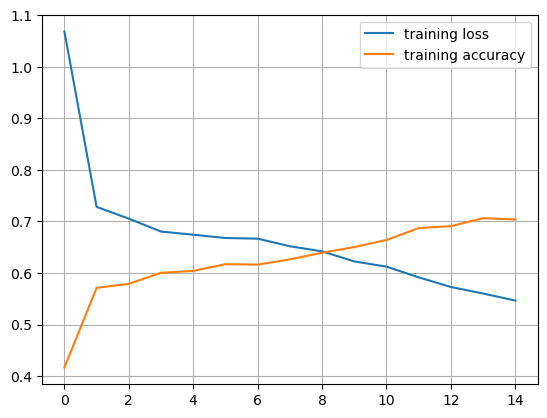

In [46]:
plt.plot(drow.history['loss'], label = 'training loss')
plt.plot(drow.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

In [47]:
model.save('drowniness_stage1.h5')

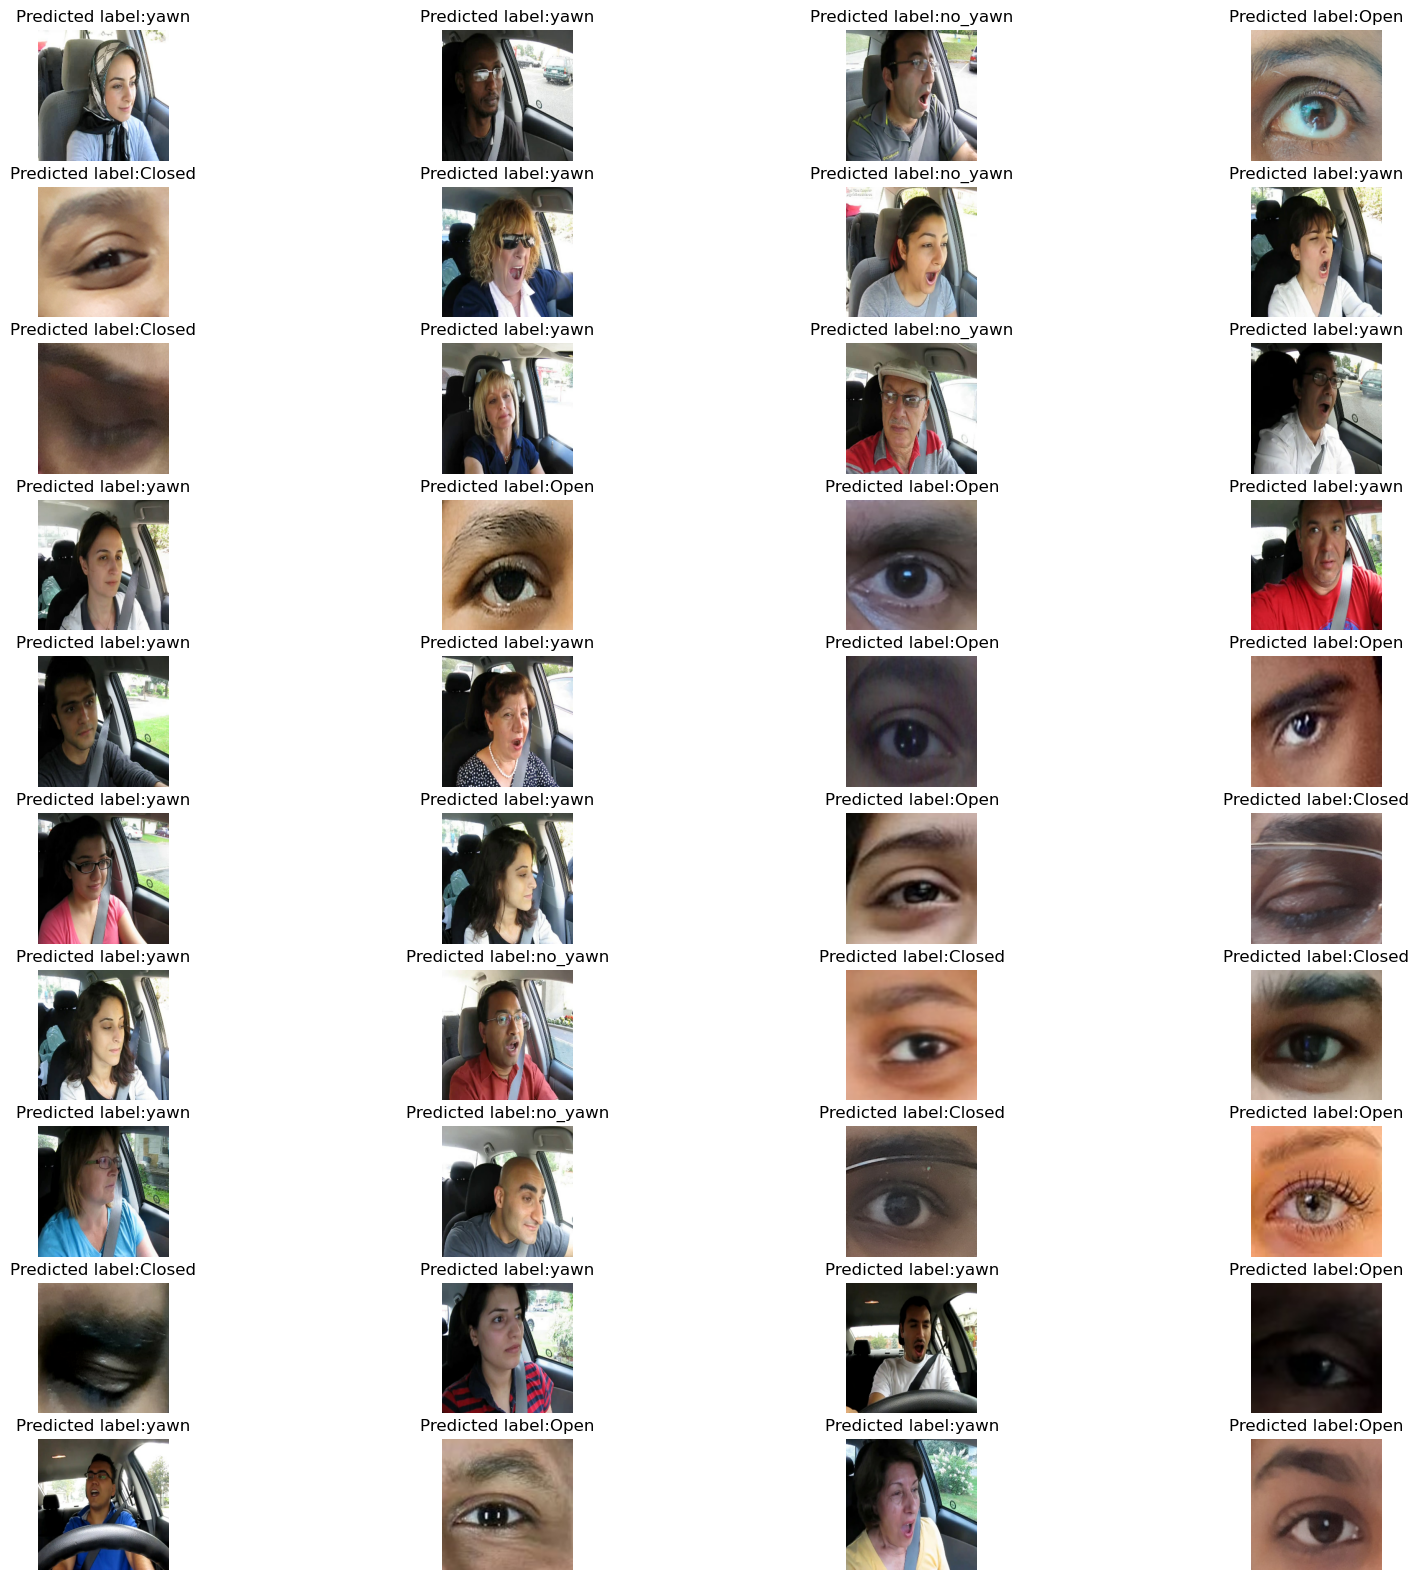

In [53]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(2):
    predictions = model.predict(images)
    predlabel = []
for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        
for i in range(40):
    
    ax = plt.subplot(10, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title('Predicted label:'+ predlabel[i])
    plt.axis('off')
    plt.grid(True)